In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

# Ice Cream Production Data 

In [3]:
#read data
df_ice_cream = pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv')

In [4]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [5]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [6]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [7]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [8]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [9]:
#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


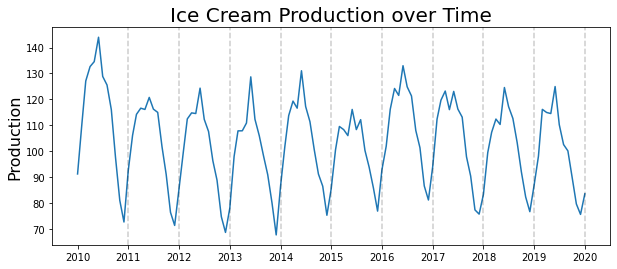

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF

The ACF plot shows a regressive idea which means that we are dealing with an auto regressive process. We may need to draw a PACF graph to gain a better understanding though 

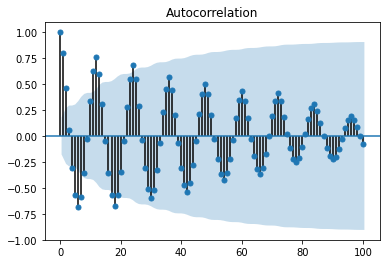

In [11]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

## PACF

Based on PACF data we can start with an auto regressive model with lag at 1, 2,3,10,13

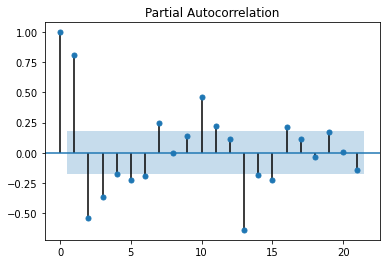

In [12]:
pacf_plot = plot_pacf(df_ice_cream.production)

# On Stock Data 

In [14]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [15]:
#define the ticker symbol
tickerSymbol = 'SPY'

In [17]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [18]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [19]:
tickerDf = tickerDf[['Close']]

In [20]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02,179.010880
2015-01-05,175.778000
2015-01-06,174.122360
2015-01-07,176.292084
2015-01-08,179.420425


Now this is not a stationary time series and is every increasing. We need to make this series stationary in order to obtain ACF and PACF and further decide on the analysis. 

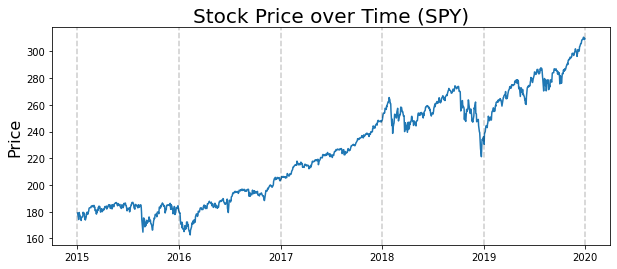

In [21]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [22]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [23]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [24]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02,179.010880,-3.232880
2015-01-05,175.778000,-1.655640
2015-01-06,174.122360,2.169724
2015-01-07,176.292084,3.128342
2015-01-08,179.420425,-1.437836


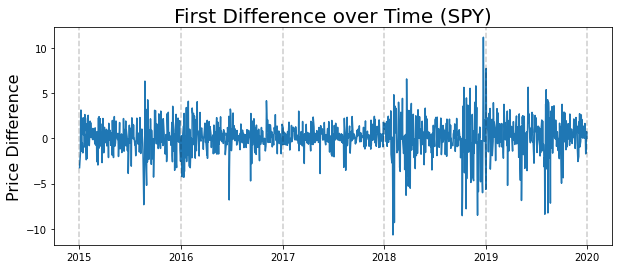

In [25]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Now as we see ACF plot is pretty inconclusive and we does not see any pattern or strong correlation out here. Similarly a PACF plot is also inconclusive for this. hence we need to understand that why it is so difficult to predict the stock data time series. 

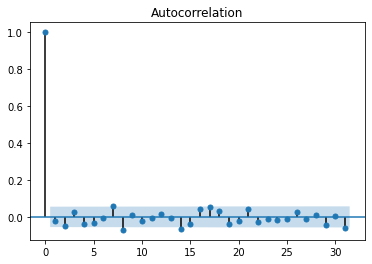

In [26]:
acf_plot = plot_acf(tickerDf.FirstDifference)

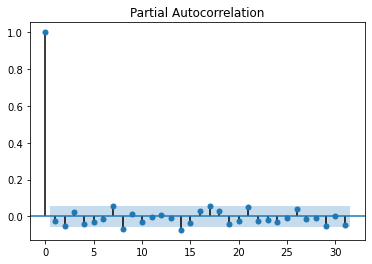

In [27]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)